# ProMI Exercise Sheet 1: Basic Probabilities & Information Theory

The first exercise sheet is about the basics of probabilities and information theory.
The exercises are a mix of theoretical questions and practical coding exercises.

For the coding exercises, we will use Python as our main programming language and rely on the NumPy and Matplotlib packages.
If you are not familiar with Python, Jupyter Notebooks, NumPy, or Matplotlib, we recommend you go through the following tutorial before starting with the exercises: https://cs231n.github.io/python-numpy-tutorial/.

The theoretical questions can be answered by adding your answers in the markdown cells and using LaTeX to write down the mathematical formulas.
Wrap your LaTeX formulas with a dollar sign, like this: `$ f(x) = 2 $` or `$$ f(x) = 2 $$` for a formula on a new line.
These would show as $ f(x) = 2 $ and $$ f(x) = 2 $$
You can double-click on a markdown cell to edit it.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import geom

In [ ]:
def test_true(test_name, value: bool):
    if value:
        #print("\033[92mTest {}: passed.\033[0m".format(test_name))
        print(f'Test {test_name}: passed.')
    else:
        #print("\033[91mTest {}: failed.\033[0m".format(test_name))
        print(f'Test {test_name}: failed.')

# equality
def test_almost_equal(test_name, value: float, target: float, precision: float = 1e-4):
    test_true(test_name, abs(value - target) < precision)

# almost equal
def test_almost_zero(test_name, value: float, precision: float = 1e-4):
    test_almost_equal(test_name, value, 0.0, precision=precision)

def test_almost_equal_array(test_name, value: np.ndarray, target: np.ndarray, precision: float = 1e-4):
    test_true(test_name, np.all(np.abs(value - target) < precision))

# Part 1: Basic Probabilities

## Question 1.1: Bonferroni Inequality

Let $A$ and $B$ be two events in a probability space. Prove the following inequality (known as the Bonferroni inequality):
$$ P(A, B) \geq P(A) + P(B) - 1 $$

### BEGIN SOLUTION
$$P(A) + P(B) - P(A, B) = P(A \cup B)$$
$$P(A \cup B) \leq 1$$
$$P(A) + P(B) - P(A, B) \leq 1$$
$$P(A, B) \geq P(A) + P(B) - 1$$

### END SOLUTION

## Question 1.2: Simple Probability Density Functions

The PDF of a random variable $X$ is given by:
$$f(x) = 
\begin{cases} 
c(2 - 2x^2) & \text{for } -1 < x < 1 \\ 
0 & \text{otherwise} 
\end{cases}$$

### 1. Find the value of $c$.

### BEGIN SOLUTION
Since $f(x)$ is a probability density function, it must integrate to 1 over its entire range:
$$\int_{-\infty}^{\infty} f(x) \, dx = 1.$$  
Given $f(x) = 0$ for $ x \leq -1 $ and $x \geq 1$, we only need to integrate from $-1$ to $1$:
$$\int_{-1}^{1} c(2 - 2x^2) \, dx = 1.$$
Factor out $c$:
$$c \int_{-1}^{1} (2 - 2x^2) \, dx = 1.$$
Split integrals:
$$c \left( \int_{-1}^{1} 2 \, dx - \int_{-1}^{1} 2x^2 \, dx \right) = 1.$$
Integrate the first term:
$$\int_{-1}^{1} 2 \, dx = 2x \Big|_{-1}^{1} = 2 - (-2) = 4.$$
Integrate the second term:
$$\int_{-1}^{1} 2x^2 \, dx = \frac{2}{3}x^3 \Big|_{-1}^{1} = \frac{2}{3} - \left( -\frac{2}{3} \right) = \frac{4}{3}.$$
Substitute and solve for $c$:
$$c \left( 4 - \frac{4}{3} \right) = 1.$$
$$c = \frac{3}{8}.$$
### END SOLUTION

### 2. Compute the expected value $E[X]$.

### BEGIN SOLUTION
$E[X]$ of a continuous random variable is given by:
$$E[X] = \int_{-\infty}^{\infty} x f(x) \, dx.$$
Again, since $f(x) = 0$ for $x \leq -1$ and $x \geq 1$, we only need to integrate from $-1$ to $1$:
$$E[X] = \int_{-1}^{1} x \cdot \frac{3}{8} (2 - 2x^2) \, dx.$$
$$E[X] = \frac{3}{8} \int_{-1}^{1} 2x - 2x^3 \, dx.$$
Integrate the first term:
$$\int_{-1}^{1} 2x \, dx = x^2 \Big|_{-1}^{1} = 1 - (-1)^2 = 0.$$
Integrate the second term:
$$\int_{-1}^{1} 2x^3 \, dx = \frac{1}{2}x^4 \Big|_{-1}^{1} = \frac{1}{2} - \frac{1}{2} = 0.$$
Therefore, $E[X] = 0$.

### END SOLUTION

### 3. What is the CDF of $X$?

### BEGIN SOLUTION

The CDF is defined as:
$$F(x) = \int_{-\infty}^{x} f(x') \, dx'.$$
Since $f(x) = 0$ for $x \leq -1$ and $x \geq 1$, we consider three cases:
1. For $x \leq -1$, $F(x) = \int_{-\infty}^{x} 0 \, dx' = 0$.
2. For $-1 < x < 1$, $F(x) = \int_{-1}^{x} \frac{3}{8} (2 - 2x'^2) \, dx'$.
3. For $x \geq 1$, $F(x) = 1$, since all the probability mass is contained within the range $-1 < x < 1$.

Case 2:
$$F(x) = \frac{3}{8} \int_{-1}^{x} 2 - 2x'^2 \, dx'.$$
$$F(x) = \frac{3}{8} \left( 2x' - \frac{2}{3}x'^3 \right) \Big|_{-1}^{x}.$$
$$F(x) = \frac{3}{8} \left( 2x - \frac{2}{3}x^3 - (-2 + \frac{2}{3}) \right).$$
$$F(x) = \frac{3}{8} \left( 2x - \frac{2}{3}x^3 + \frac{4}{3} \right).$$
$$F(x) = -\frac{1}{4}x^3 + \frac{3}{4}x + \frac{1}{2}.$$

### END SOLUTION

### 4. (Coding) Plot the PDF and CDF of $X$

In [ ]:
def pdf(x):
    ### BEGIN SOLUTION
    return 3/8 * (2 - 2*x**2) if -1 < x < 1 else 0
    ### END SOLUTION

def cdf(x):
    ### BEGIN SOLUTION
    return -1/4 * x**3 + 3/4 * x + 1/2 if -1 < x < 1 else 0 if x <= -1 else 1
    ### END SOLUTION

In [ ]:
xs = np.linspace(-1.5, 1.5, 1000)

pdf_values = [pdf(x) for x in xs]
cdf_values = [cdf(x) for x in xs]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, pdf_values, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(xs, cdf_values, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

## Question 1.3: De Morgan's Law
Let $E_1$ and $E_2$ are mutually independent events. Show that $\bar{E}_1$ and $\bar{E}_2$ are also mutually indepent. Remark De Morgan's law: $p(\bar{A},\bar{B}) = p(\overline{A \cup B})$

### BEGIN SOLUTION

We must show:
$p(\bar{E_1},\bar{E_2})=p(\bar{E_1})p(\bar{E_2}) \,.$

De Morgan's law

$$p(\bar{E_1},\bar{E_2})=p(\overline{E_1 \cup E_2})$$

Further adjust terms:

$$ p(\overline{E_1 \cup E_2}) = 1-p(E_1 \cup E_2) = 1-(p(E_1)+p(E_2)-p(E_1,E_2)) = 1-p(E_1)-p(E_2)+p(E_1,E_2) $$

Using the independence of $E_1$ and $E_2$ we get:
$$1-p(E_1)-p(E_2)+p(E_1, E_2) = 1-p(E_1)-p(E_2)+p(E_1)p(E_2)$$

We can factorize this as:

$$1-p(E_1)-p(E_2)+p(E_1)p(E_2) = (1-p(E_1))(1-p(E_2)) = p(\bar{E_1})p(\bar{E_2})$$

q.e.d.

### END SOLUTION

## Question 1.4: LRU Technique 

Consider a system that cache files using a Least Recently Used (LRU) technique. In this system, the probability of requesting a popular file is $p(P) = 0.10$. If a cache's update happens, the probability of requesting a popular file is $p(P|U) = 0.20$. However, if no update has happened, the probability is only $p(P | \bar{U}) = 0.05$. Find:

### 1. The probability of an update $p(U)$.

### BEGIN SOLUTION
Using the law of total probability:  
$$p(P) = p(P | U)  p(U) + p(P | \bar{U}) p(\bar{U})$$

Since $ p(\bar{U}) = 1 - p(U)$, and substituing the given values:  
$$0.10 = (0.20)  p(U) + (0.05)  (1 - p(U))$$  
$$0.05 = 0.15  p(U)$$  
$$p(U) = \frac{1}{3} \approx 0.333$$  


### END SOLUTION

### 2. The probability of an update given a popular file was requested $p(U|P)$.

### BEGIN SOLUTION
Using Bayes' rule and $p(U)$ from item **a**:  
$$p(U | P) = \frac{p(P | U) p(U)}{p(P)} = \frac{0.20  \frac{1}{3}}{0.10} = \frac{2}{3} \approx 0.667$$

Thus, the probability of an update given a popular file was requested is 0.667.

### END SOLUTION

## Question 1.5: Independence

Due to variations in the distance from Earth, the arrival time of daily updates of a robot on Mars follows a uniform distribution between 7 AM and 8 AM. Based on the events $A = \text{update has not arrived by 7:30 AM}$ and $B = \text{update has arrived by 7:31 AM}$.

### 1. Are A and B independent? Prove your answer.

### BEGIN SOLUTION
First, let's define $p(A)$ and $p(B)$:  
$$p(A) = \frac{\text{length of interval between 7 AM and 7:30 AM}}{\text{length of interval between 7 AM and 8 AM}} = \frac{30}{60} = \frac{1}{2}$$  
$$p(B) = \frac{\text{length of interval between 7 AM and 7:31 AM}}{\text{length of interval between 7 AM and 8 AM}} = \frac{31}{60}$$
$$p(A)p(B) =  \frac{31}{120}$$

Given the uniform distribution, $p(A,B)$, i.e., the probability of arriving between 7:30 AM and 7:31 AM, can also be defined:
$$p(A,B) = \frac{\text{length of interval between 7:30 AM and 7:31 AM}}{\text{length of interval between 7 AM and 8 AM}} = \frac{1}{60}$$

Therefore, the events are not independent since $p(A) p(B) \neq p(A,B)$.

### END SOLUTION

### 2. Find:
$p(B|A)$

### BEGIN SOLUTION

Using the conditional probability:  
$$p(B|A) = \frac{p(A,B)}{p(A)} = \frac{\frac{1}{60}}{\frac{1}{2}} = \frac{1}{30}$$

### END SOLUTION

### 2. Find:
$p(A|B)$

### BEGIN SOLUTION
Using the conditional probability again:  
$$p(A|B) = \frac{p(A,B)}{p(B)} = \frac{\frac{1}{60}}{\frac{31}{60}} = \frac{1}{31}$$
### END SOLUTION

## Question 1.6: Probability Density Function

Consider the random variable $X$ with pdf $f(x)$ given by:
$$f(x) = 
\begin{cases}
a(1+x), & -1 < x \leq 0 \\
a(1-x), & 0 < x \leq 1 \\
0, & \text{elsewhere}
\end{cases}$$

### a. Find the constant $a$ and plot $f(x)$.

### BEGIN SOLUTION
The total probability over the sample space is exactly one, therefore:
$$\int_{-\infty}^{\infty} f(x) \, dx = 1$$

Substituting the definition of $f(x)$:
$$\int_{-1}^{0} a(1 + x) \, dx + \int_{0}^{1} a(1 - x) \, dx = 1$$

And solving both integrals:
$$a \left[ x + \frac{x^2}{2} \right]_{-1}^{0} + \left[ x - \frac{x^2}{2} \right]_{0}^{1} = 1$$
$$a \left( 0 - \left( -1 + \frac{1}{2} \right) \right) + a\left(\left( 1 - \frac{1}{2} \right) - 0\right) = 1 $$
$$ \frac{a}{2} + \frac{a}{2} = 1 $$

Thus, $a = 1$.
### END SOLUTION

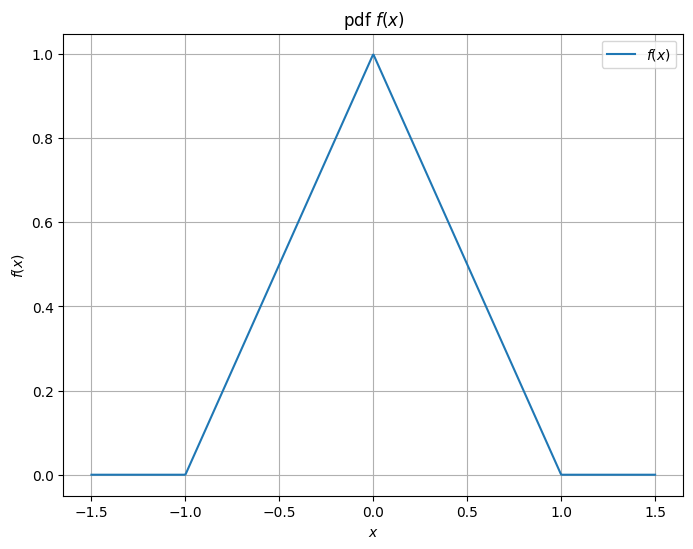

In [1]:
### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt

a = 1
def f(x):
    if -1 < x <= 0:
        return a*(1 + x)
    elif 0 < x <= 1:
        return a*(1 - x)
    else:
        return 0

num_points = 1000
eval_interval = [-1.5, 1.5]
x_eval = np.linspace(eval_interval[0], eval_interval[1], num_points)
f_vec = np.vectorize(f, otypes=[np.float32])  
f_eval = f_vec(x_eval)

# Plot f(x)
plt.figure(figsize=(8, 6))
plt.plot(x_eval, f_eval, label=r'$f(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'pdf $f(x)$')
plt.grid(True)
plt.legend()
plt.show()
### END SOLUTION

### b. Define the CDF $F(x)$ and plot it.


### BEGIN SOLUTION
The CDF is defined as:
$$F(x) = p(X \leq x) = \int_{-\infty}^{x'} f(x') \, dx'$$

Evaluating for each interval:   
For $x \leq -1:$   
$$F(x) = 0, \text{since the pdf is zero for } x < -1 $$

For $-1 < x \leq 0:$   
$$F(x) =  \int_{-1}^{x} 1 + x' \, dx' =  \left[ x' + \frac{x'^2}{2} \right]_{-1}^{x} =  x + \frac{x^2}{2} + \frac{1}{2} = \frac{1}{2}(1+x)^2$$

For $0 < x \leq 1:$   
$$F(x) = F(0) + \int_{0}^{x} 1 - x' \, dx' =  \frac{1}{2} + \left[ x' - \frac{x'^2}{2} \right]_{0}^{x} = \frac{1}{2} + x - \frac{x^2}{2} = 1 - \frac{1}{2}(1-x)^2$$


For $x > 1:$   
$$F(x) = 1, \text{as the pdf is completly accumulated when } x = 1 $$

Therefore,
$$ F(x) = 
\begin{cases}
0, & x < -1 \\
\frac{1}{2}(1 + x)^2, & -1 < x \leq 0 \\
1 - \frac{1}{2}(1 - x)^2, & 0 < x \leq 1 \\
1, & x > 1
\end{cases}$$
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
def CDF(x):
    if x < -1:
        return 0
    if -1 < x <= 0:
        return 0.5*(1 + x)**2
    elif 0 < x <= 1:
        return 1.0 - 0.5*(1 - x)**2
    else:
        return 1

CDF_vec = np.vectorize(CDF, otypes=[np.float32])  
CDF_eval = CDF_vec(x_eval)

# Plot CDF
plt.figure(figsize=(8, 6))
plt.plot(x_eval, CDF_eval, label=r'$F(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$F(x)$')
plt.title(r'CDF F(x)$')
plt.grid(True)
plt.legend()
plt.show()
### END SOLUTION

### c. Find point $b$ such that:
$p(X > b) = \frac{1}{2}p(X \leq b)$.


### BEGIN SOLUTION
The events are complementary, therefore:
$$p(X > b) = 1 - p(X \leq b)$$

Substituing the given condition $p(X > b) = \frac{1}{2}p(X \leq b)$:
$$ \frac{1}{2}p(X \leq b) = 1 - p(X \leq b)$$
$$ p(X \leq b) = \frac{2}{3}$$

Thus, $b \in [-1,1]$, since the $p(x) = 0 $ for any $x \notin [-1, 1]$. $p(X \leq b)$ is computed by:
$$p(X \leq b) = \int_{-1}^{b} f(x) \, dx= F(b)$$

From the CDF obtained in the previous item, we need to solve $b$ for each interval.   
For $-1 < x \leq 0:$   
$$\frac{1}{2} (1 + b)^2 = \frac{2}{3}$$
$$(1 + b) = \pm \frac{2}{\sqrt{3}}$$
$$b = \pm \frac{2}{\sqrt{3}} - 1$$
$$\text{Since $b \in [-1,0]$, no solution possible}$$

For $0 < x \leq  1:$   
$$1 - \frac{1}{2} (1 - b)^2 = \frac{2}{3}$$
$$(1 - b)^2 = \frac{2}{3}$$
$$b = 1 \pm \frac{\sqrt{2}}{\sqrt{3}}$$
$$\text{Since $b \in [0,1]$}, b = 1 - \frac{\sqrt{2}}{\sqrt{3}} \approx 0.183 $$

Therefore, $b \approx 0.183$.
### END SOLUTION

## Question 7: Joint Probability
About joint probabilities, prove $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} p(x,y) \, dxdy = 1$.

### BEGIN SOLUTION
From the marginal probability:
$$ p(y) = \int_{-\infty}^{\infty} p(x,y) \, dx$$
Substituting this into the original integral:
$$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} p(x,y) \, dxdy = \int_{-\infty}^{\infty}  p(y) \, dy $$
The integral equals 1 based on Probability Axiom 2.
### END SOLUTION

# Part 2: Distribution Statistics

## Problem 2.1: Expectation & Variance

We consider the coffee consumption of two Computer Science students, Alice and Bob.
Let $X$ and $Y$ be random variables characterizing the number of coffees that Alice and Bob respectively drink in a day.
These are **discrete** random variables.
The possible numbers of daily coffees for each programmer are denoted as $\mathcal{X}$ for Alice and $\mathcal{Y}$ for Bob.
We denote their probability mass functions as $p_X$ and $p_Y$.

We model Alice's consumption as follows:
- $\mathcal{X} = \{0, 1, 2, 3, 4, 5\}$
- $p_X = [0.05, 0.10, 0.40, 0.25, 0.10, 0.10]$

where $p_{X}[x] = p_{X}(x), \quad x \in \mathcal{X}$.

We model Bob's consumption as follows:
- $\mathcal{Y} = \{0, 1, 2, 3, 4, 5, 6, 7\}$
- $p_Y = [0.00, 0.01, 0.09, 0.20, 0.30, 0.20, 0.10, 0.10]$

where $p_{Y}[y] = p_{Y}(y), \quad y \in \mathcal{Y}$.

For instance, the probability that Bob drinks 2 coffees today is $p_{Y}(2) = 0.09$.

### Question 2.1a) Theoretical Questions
#### 1. Give the definition of the expected value of $X$, denoted as $\mathbb{E}[X]$.
#### 2. Show that the expectation is linear, e.g. by showing that from $\mathbb{E}[aX + bY] = a \mathbb{E}[X] + b \mathbb{E}[Y]$ for constants $a$ and $b$.
#### 3. Give the definition of the variance of $X$, denoted as $\mathbb{V}[X]$.
#### 4. Show that $\mathbb{V}[cX] = c^2 \mathbb{V}[X]$ for any constant $c \in \mathbb{R}$.
#### 5. Give the formula connecting the variance $\mathbb{V}[X]$ and the standard deviation $\sigma_X$ of $X$.
#### 6. Considering $\mathcal{X}$ and $p_X$:
    1. Compute the expected value of $X$.
    2. Compute the variance of $X$.
    3. Compute the standard deviation of $X$.

   
### BEGIN SOLUTION

1. $$\mathbb{E}[X] = \sum_{x \in \mathcal{X}} x p(x)$$
2. 
$$
\begin{split}
\mathbb{E}[aX + bY] & = \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} (a x + b y) p(x, y) \\
& = \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} a x p(x, y) + \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} b y p(x, y) \\
& = \sum_{x \in \mathcal{X}} a x p(x) + \sum_{y \in \mathcal{Y}} b y p(y) \\
& = a \sum_{x \in \mathcal{X}} x p(x) + b \sum_{y \in \mathcal{Y}} y p(y) \\
& = a\mathbb{E}[X] + b \mathbb{E}[Y]
\end{split}
$$
3. $$\mathbb{V}[X] = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - \mathbb{E}[X]^2$$

4.
$$
\begin{split}
\mathbb{V}[cX] & = \mathbb{E}[(cX)^2] - \mathbb{E}[cX]^2 \\
& = \mathbb{E}[c^2 X^2] - (c \mathbb{E}[X])^2 \\
& = c^2 \mathbb{E}[X^2] - c^2 \mathbb{E}[X]^2 \\
& = c^2 (\mathbb{E}[X^2] - \mathbb{E}[X]^2) \\
& = c^2 \mathbb{V}[X]\end{split}
$$
5. $$\sigma_{X}^{2} = \mathbb{V}[X]$$
6. 1:  E(X) = 2.55  
    2: V(X) = 1.55  
    3: $\sigma_x  \approx 1.24 $

### END SOLUTION

### Question 2.1b) Practical Questions
We instantiate the set of possible values for $X$ and $Y$, and their associated possibilities below using numpy arrays.

In [ ]:
x_values = np.array([0, 1, 2, 3, 4, 5])
x_probabilities = np.array([0.05, 0.10, 0.40, 0.25, 0.10, 0.10]) # NOTE: x_probabilities[i] == probability of x_values[i]
y_values = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y_probabilities = np.array([0.00, 0.01, 0.09, 0.20, 0.30, 0.20, 0.10, 0.10])

# Sanity check, the probabilities must sum to 1 (taking into account numerical precision)
assert np.isclose(x_probabilities.sum(), 1), "Probabilities should sum to 1."
assert np.isclose(y_probabilities.sum(), 1), "Probabilities should sum to 1."

Let us visualize their PMF below.
Based on this visualization, think about which random variable has the highest variance and think about what should roughly be the expected value of each random variable. Check if it is coherent with what you computed for $X$.
(This is not a question, just a first sanity check.)

In [ ]:
# Creating figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4), squeeze=True)

# x
axs[0].bar(x_values, x_probabilities)
axs[0].set_ylabel("p_X(x)")
axs[0].set_xlabel("x")

# y
axs[1].bar(y_values, y_probabilities)
axs[1].set_ylabel("p_Y(y)")
axs[1].set_xlabel("y")

plt.show()

#### 1. Implement the functions `expectation`, `variance` and `standard_deviation` below to respectively compute the expected value, the variance and the standard deviation using the formula you provided.

In [ ]:
def expectation(possible_values: np.ndarray, probabilities: np.ndarray):
    ### BEGIN SOLUTION
    return possible_values @ probabilities
    ### END SOLUTION

def variance(possible_values: np.ndarray, probabilities: np.ndarray):
    ### BEGIN SOLUTION
    expected_value = expectation(possible_values, probabilities)
    return expectation(possible_values ** 2, probabilities) - expected_value ** 2
    ### END SOLUTION

def standard_deviation(possible_values: np.ndarray, probabilities: np.ndarray):
    ### BEGIN SOLUTION
    var = variance(possible_values, probabilities)
    return np.sqrt(var)
    ### END SOLUTION

####  2.   Verify the implementation of the above functions:
   
   a. Does the value of $\mathbb{E}[X]$ you computed previously match the output of your implemented function?
   
   b. Do you find that $\mathbb{E}[Y]$ is roughly what you could have guessed by visualizing the PMF of $Y$?
   
   c. Do you find that $\mathbb{V}[cX] = c^2 \mathbb{V}[X]$ for any value of $c \in \mathbb{R}$?

In [ ]:
### BEGIN SOLUTION
# x
mu_x = expectation(x_values, x_probabilities)
var_x = variance(x_values, x_probabilities)
sigma_x = standard_deviation(x_values, x_probabilities)

# y
mu_y = expectation(y_values, y_probabilities)
var_y = variance(y_values, y_probabilities)
sigma_y = standard_deviation(y_values, y_probabilities)

# c x
c = 1.5 
cx_values = c * x_values
mu_cx = expectation(cx_values, x_probabilities)
var_cx = variance(cx_values, x_probabilities)
sigma_cx = standard_deviation(cx_values, x_probabilities)

print(f"mu_x = {mu_x}, mu_y = {mu_y}, mu_cx = {mu_cx}")
print(f"var_x = {var_x:.2f}, var_y = {var_y:.2f}, var_x = {var_cx:.2f}")
print(f"sigma_x = {sigma_x:.2f}, sigma_y = {sigma_y:.2f}, sigma_cx = {sigma_cx:.2f}")
### END SOLUTION

### BEGIN SOLUTION

2. 1. The value should be the same.
   2. The guess based on PMF should make sense.
   3. The equation should always work.

### END SOLUTION

####  3. Interpret the results:
   
a. Who drinks the most coffee in a day in expectation?

b. Who tends to have the most variable number of daily coffees?

c. How many coffees in total do Alice and Bob drink daily in expectation?

### BEGIN SOLUTION

3. 1. Bob drinks the most coffee.
   2. Bob has a highest variability in the number of coffees he drinks daily.
   3. They drink 6.84 coffees per day on average, using the linearity of expectation.
### END SOLUTION

## Problem 2.2: Kurtosis

A PhD student from IAS is attempting to log into a PC in the robotic lab.
The problem is that this PhD student is used to using an AZERTY keyboard layout, while all PCs in the lab either use a QWERTY or QWERTZ keyboard layout on the login screen.
We would like to study the number of trials this PhD student needs to successfully log in.
We denote as $X$, $Y$, and $Z$ the random variables characterizing the number of attempts it takes for the student to successfully log in when using an AZERTY, a QWERTY, and a QWERTZ layout respectively.
We model these distributions using independent geometric distribution.

The geometric distribution models the occurrence of the first success in an endless series of independent and identically distributed Bernoulli trials.
A Bernoulli trial, also known as a binomial trial, is a random experiment that results in one of two outcomes: "success" or "failure," with the probability of success represented as $p_{success}$.
The probability mass function for a geometric distribution is defined as follows:
$$
p(k) = (1 - p_{success})^{k-1} p_{success}
$$
and it denotes the probability of being successful on the $k$-th trial.

In the described setting, we consider different probabilities of success for each keyboard layout:
- AZERTY, where the success of an attempt is highly probable: $p_{succcess}^{X} = 0.9$,
- QWERTY, where the success of an attempt is somewhat probable: $p_{succcess}^{Y} = 0.5$,
- QWERTZ, where the success of an attempt is quite unlikely: $p_{succcess}^{Z} = 0.2$.

We then note $p_X(k)$ as the probability that the PhD student successfully logs in on its exactly $k$-th attempt and use analogous notations for $p_Y$ and $p_Z$.

### Question 2.2a) Theoretical Questions

#### 1. Give the definition of the kurtosis of a random variable $X$, denoted as $\mathrm{Kurt}[X]$. You can use $\mu$ and $\sigma$ as symbols to denote the expected value and standard deviation of $X$ respectively.

#### 2. Explain in one sentence what the kurtosis measures about a probabilistic distribution.

### BEGIN SOLUTION
    
1. $\mathrm{Kurt[X] = \mathbb{E} \left[ \left( \frac{X - \mu}{\sigma} \right)^4 \right]} - 3$
2. The kurtosis is a measure of "how long" the tail of a distribution is.

### END SOLUTION

### Question 2.2b) Practical Questions

We will rely on the `scipy` package to use the geometric distribution more easily.
We start by instantiating a random variable for each keyboard layout and storing them in a dictionary.

In [ ]:
# Define probability of success at each trial for each keyboard layout
ps_success = {
    "azerty": 0.9,
    "qwerty": 0.5,
    "qwertz": 0.2,
}

# Random variables for each keyboard layout
geoms = {layout: geom(p_success) for layout, p_success in ps_success.items()}

Let us visualize the PMF for each keyboard layout. We plot in linear and logarithmic scale to see *how big* the tail of each distribution is.

In [ ]:
# Compute pmf up to some maximum number of trials
# We assume that higher values have too low probability to be
# significant.
max_num_trials = 15
num_trials = np.arange(0, max_num_trials+1)
pmfs = {layout: g.pmf(num_trials) for layout, g in geoms.items()}

# Plot pmfs
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for layout, g in geoms.items():
    # linscale
    axs[0].plot(num_trials, pmfs[layout], "o", label=layout)
    axs[0].vlines(num_trials, 0, pmfs[layout])
    # logscale
    axs[1].plot(num_trials, pmfs[layout], "o", label=layout)
    axs[1].set_yscale('log')
axs[0].set_xlabel("Number of trials")
axs[1].set_xlabel("Number of trials")
axs[0].set_ylabel("Probability of success after exactly n trials")
plt.legend()
plt.show()

You should notice that these distributions have different sizes of tail and it is where the kurtosis comes in handy.

#### 1. Implement the function `kurtosis` below to compute the kurtosis using the formula you provided.

In [ ]:
def kurtosis(possible_values: np.ndarray, probabilities: np.ndarray):
    ### BEGIN SOLUTION
    mu = expectation(possible_values, probabilities)
    sigma = standard_deviation(possible_values, probabilities)
    return probabilities @ ((possible_values - mu) / sigma) ** 4 - 3
    ### END SOLUTION

#### 2. Compare the kurtosis values your function outputs against the kurtosis values computed by `scipy`.

In [ ]:
### BEGIN SOLUTION
kurtosis_scipy = {k: g.stats("k") for k, g in geoms.items()}
kurtosis_handcrafted = {k: kurtosis(num_trials, pmf) for k, pmf in pmfs.items()}

print(f"Kurtosis scipy = {kurtosis_scipy}")
print(f"Kurtosis handcrafted = {kurtosis_handcrafted}")
### END SOLUTION

#### 3. Could you have anticipated that the distribution for certain keyboard layouts have higher/lower kurtosis? Explain.
#### 4. In this particular context, give a semantic interpretation to the size of the tail of the distribution.
#### 5. Do you notice how our way of computing the kurtosis underestimates the kurtosis of long-tailed distributions? Provide an explaination by thinking about possible wrong assumptions we have made.

### BEGIN SOLUTION
3. It could have been anticipated from the PMF plot showing longer tails for QWERTZ.
4. The bigger the size of the tail, the more trials the student typically requires to successfully log in.
5. When we set max_num_trials to a low value, we truncate a big part of the long-tailed distribution and it is what it is not noticeable on small-tailed distributions but breaks with long-tailed once. 
### END SOLUTION

## Problem 2.3: Median vs. Expectation

Your favorite hard-drive manufacturer is happy to advertise that, in expectation, their hard drives break after only 100,000 hours of usage.
Despite your trust in this company, you decide to investigate a little bit.

You decide to assume that the time to failure/breakage follows an exponential distribution.
Let $T$ be a **continuous** random variable following an exponential distribution, i.e. its probability density function (PDF) is defined as
$$
p_T(t) = \lambda e^{-\lambda t}, \quad \lambda > 0, \quad t \in [0, +\infty).
$$
We consider $T$ to characterize the number of years it takes for a hard drive to break.

### Question 2.3a) Theoretical Questions

#### 1. Give a closed form for the expected value of $T$, denoted as $\mathbb{E}[T]$.
#### 2. Compute the value of $\lambda$ that would yield an average lifetime of 100,000 hours, assuming $\lambda$ is in breakages/second.
#### 3. Give the cumulative density function (CDF) of $T$, denoted as $F_T(t)$, as a function of $p_t$.
#### 4. Give closed-form for $F_T(t)$.
#### 5. Give the definition of the median of a random variable.
#### 6. Compute the median of $T$, denoted $\mathrm{med}_T$ as a function of $\lambda$, and give a numerical value using the value of $\lambda$ you computed before.
#### 7. How does the lifetime of 50\% of the manufacturer's hard drive compare to the advertised expected lifetime?
#### 8. Propose one or more possible issue(s) with our reasoning which might have led to unfair results to your favorite manufacturer.

### BEGIN SOLUTION

1. $$\mathbb{E}[T] = \int_0^\infty t\lambda e^{-\lambda t}dt = \frac{1}{\lambda}$$
2. $$\frac{1}{\lambda} = 100 000 * 3600 \Rightarrow \lambda = 2.78^{-9} \mathrm{ breakages/second}$$
3. $$F_T(t) = \int_{0}^{t} p_T(t') dt'$$
NOTE: if using a lower bound of integral as $-\infty$, it is still considered valid.

4. $$F_T(t) = 1 - e^{-\lambda t}$$

5. The median $m$ is such that $F_T(m) = 0.5$, i.e. it splits the probability mass into two halves.

6. $$\mathrm{med}_T = \frac{\ln 2}{\lambda} \approx 69315 \mathrm{hours}$$

7. The median lifetime is more than 30% lower than the expected lifetime.

8. We assumed that $T$ followed an exponential distribution, which might not be correct.

### END SOLUTION

## Question 2.3b) Practical Questions
Let us compute the median using Python.
Firstly, we visualize the PMF.


In [ ]:
lmbda = 1e-5
max_t = 1e6
stepsize = 1000 # stepsize should be small for high lambdas
assert lmbda > 0, "The value of lambda should be strictly positive!"

# Discretizing set of ws, pdf and cdf
t = np.linspace(0, max_t, num=int(max_t / stepsize))
p_T = lmbda * np.exp(-lmbda * t)
F_T = np.cumsum(p_T) * stepsize # emulating integration as sum of small rectangles

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
axs[0].plot(t, p_T)
axs[0].set_xlabel("time to failure t [seconds]")
axs[0].set_ylabel("p_T(t)")
axs[1].plot(t, F_T)
axs[1].set_ylabel("F_T(t)")
axs[1].set_xlabel("time to failure t [seconds]")
plt.show()

#### 1. Implement the function `get_theoretical_median` from the formula you derived before.

In [ ]:
def get_med_theoretical():
    ### BEGIN SOLUTION
    # Theoretical median
    med_theoretical = np.log(2) / lmbda
    return med_theoretical
    ### END SOLUTION

#### 2. Compute the median by leveraging `F_T` that we computed before in the function `get_med_practical`.

In [ ]:
def get_med_practical():
    ### BEGIN SOLUTION
    # Practical median
    idx = (F_T > 0.5).nonzero()[0][0] # first index where F_w is greater than 0.5
    med_practical = t[idx] # getting value of w associated to idx
    return med_practical
    ### END SOLUTION

#### Public Tests

In [ ]:
med_theoretical = get_med_theoretical()
med_practical = get_med_practical()
print(f"med_theo = {med_theoretical:.0f}, med_prac = {med_practical}")

#### 3. If there is a discrepency between the theoretical and the practical median, how do you explain it? How could you simply fix it?

### BEGIN SOLUTION
    
3. Setting a smaller stepsize would allow making numerical integration more accurate.
### END SOLUTION

## Problem 2.4: Covariance and Correlation

### Question 2.4a) Theoretical Questions
1. Give the definition of the covariance $\mathrm{Cov}[X, Y]$ between two random variables $X$ and $Y$.
2. Show that $\mathbb{V}[X + Y] = \mathbb{V}[X] + \mathbb{V}[Y] + 2 \mathrm{Cov}[X, Y]$. What does this formula become when $X$ and  $Y$ are independent?

### BEGIN SOLUTION

1. $\mathrm{Cov}[X, Y] = \mathbb{E} \left[ \left( X - \mu_X \right) \left( Y - \mu_Y \right) \right]$
2. 
$$
\begin{split}
\mathbb{V}[X + Y] &= \mathbb{E} \left[ (X + Y)^2 \right] - \mathbb{E} \left[ (X + Y) \right]^2 \\
&= \mathbb{E} \left[ X^2 + Y^2 + 2 X Y \right] - \left( \mathbb{E} \left[ X \right] + \mathbb{E} \left[ Y \right] \right)^2 \\
&= \mathbb{E} \left[ X^2 \right] + \mathbb{E} \left[ Y^2 \right] + 2 \mathbb{E} \left[ X Y \right] - \left( \mathbb{E} \left[ X \right]^2 + \mathbb{E} \left[ Y \right]^2 + 2 \mathbb{E} \left[ X \right] \mathbb{E} \left[ Y \right] \right) \\
&= \mathbb{E} \left[ X^2 \right] + \mathbb{E} \left[ Y^2 \right] + 2 \mathbb{E} \left[ X Y \right] -  \mathbb{E} \left[ X \right]^2 - \mathbb{E} \left[ Y \right]^2 - 2 \mathbb{E} \left[ X \right] \mathbb{E} \left[ Y \right] \\
&= \mathbb{E} \left[ X^2 - \mathbb{E} \left[ X \right]^2 \right] + \mathbb{E} \left[ Y^2 - \mathbb{E} \left[ Y \right]^2 \right] + 2 \left[ \mathbb{E} \left[X Y \right] - \mathbb{E} \left[ X \right] \mathbb{E} \left[Y \right] \right] \\
&= \mathbb{V}[X] + \mathbb{V}[Y] + 2 \mathrm{Cov}[X, Y]
\end{split}
$$
If $X$ and $Y$ are independent, then $\mathrm{Cov}[X, Y] = 0$.

### END SOLUTION

# Part 3: Information Theory

## Question 1: Entropy
You are given an array of integers $X$ with $\forall x \in X: x \geq 0$. Our goal is the calculate the entropy of $X$. Therefore follow the steps below:

### 1.  Implement the function ```get_pmf_1d(X: np.array)``` which outputs the probability mass function for X, so p[x]=relative frequency of x in X. Think about for which indices $x$ p[x] must store a value.

In [ ]:
def get_pmf_1d(X: np.array):
    ### BEGIN SOLUTION
    n = X.shape[0]
    minimum, maximum = np.min(X), np.max(X)
    assert minimum >= 0
    pmf = np.zeros((maximum+1,))
    for x in X:
        pmf[x] += 1
    return pmf / n
    ### END SOLUTION

#### Public Tests

In [ ]:
test_cases = [(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),np.ones(10) * 0.1),(np.array([0, 2, 2, 5, 8, 1, 6, 0, 8, 9]),np.array([0.2, 0.1, 0.2, 0, 0, 0.1, 0.1, 0, 0.2, 0.1]))]
            

for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = get_pmf_1d(X)
    
    test_almost_equal_array(f'{i}', pred, sol)
    test_almost_equal(f'Sum {i}', np.sum(pred), 1.0)

### 2. Implement the function ```compute_entropy(p: np.array)``` which computes the entropy $H(X)$ of the probability mass function $p$ using get_mf_1d

In [ ]:
def compute_entropy(X: np.array):
    ### BEGIN SOLUTION
    probs = get_pmf_1d(X)
    probs = probs[probs > 0]
    return -np.sum(probs*np.log2(probs))
    ### END SOLUTION

#### Public Tests

In [ ]:
test_cases = [
    ((np.array([1, 2, 3, 4])), 2),
    ((np.array([0, 0, 0, 0])), 0),
]

for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = compute_entropy(X)
    test_almost_equal(f'{i}', pred, sol)

## Question 2: Compute for a Binary erasure channel the Channel Capacity (Theory question)
In this question compute the channel capacity of a binary erasure channel with erasure probability $p_e = 0.25$ and put your result as latex code in the underlying markdown cell. Furthermore, what are the probabilities of the input $P(x)$ for which the channel capacity is achieved?

The channel capacity is given by: 

$$C=\max _{p(x)} \mathrm{I}(X ; Y)$$

*Hint:* Think about the probabilities of the input P(x). How are the input probabilities related to the max operator?

### BEGIN SOLUTION

The input probabilities that **maximize** the mutual information are P(X=0) = 0.5 and P(X=1) = 0.5. This can be shown by examining the formula for the mutual information:  
$$
I(X ; Y) = H(X) - H(X | Y).
$$  


#### Step 1: Entropy H(X)

The entropy H(X) quantifies the average level of uncertainty about X. Entropy is **maximized** when uncertainty is **highest**, which occurs when all outcomes are equally likely.  

In our case, X is a binary random variable, and the entropy is maximized when:  
$$
P(X=0) = P(X=1) = 0.5.
$$  
Thus, H(X) is maximized for a uniform input distribution.



#### Step 2: Conditional Entropy H(X | Y)

The conditional entropy H(X | Y) describes the uncertainty about X given the observation Y. A lower H(X | Y) indicates that Y provides more information about X.  

The formula for the conditional entropy is:  
$$
H(X | Y) = \sum_{y \in \mathcal{Y}} P(Y=y) H(X | Y=y),
$$
where we sum over the possible values of Y and their corresponding conditional entropies.  

We now consider the three cases for the binary erasure channel (BEC):  

1. **Case Y = 0 and Y = 1:**  
   If Y = 0 or Y = 1, we know with certainty that X must be X = 0 or X = 1, respectively. This follows from the unique structure of Binary Erasure Channels. Since there is no uncertainty in these cases:  
   $$
   H(X | Y = 0) = 0 \quad \text{and} \quad H(X | Y = 1) = 0.
   $$  

2. **Case Y = e (erasure):**  
   When Y = e, the observation provides no information about X. Thus, the conditional entropy in this case is equal to the entropy of X:  
   $$
   H(X | Y = e) = H(X).
   $$  


#### Step 3: Substituting into the Conditional Entropy Formula

Substituting these results into the formula for H(X | Y), we get:  
$$
H(X | Y) = P(Y = e) H(X | Y = e) + P(Y = 0) H(X | Y = 0) + P(Y = 1) H(X | Y = 1).
$$  
Simplifying:  
$$
H(X | Y) = P(Y = e) H(X) + P(Y = 0) ⋅ 0 + P(Y = 1) ⋅ 0.
$$  
Since P(Y = e) = 0.25 (the erasure probability), we have:  
$$
H(X | Y) = 0.25 H(X).
$$  


#### Step 4: Mutual Information

Now, substituting H(X | Y) into the mutual information formula:  
$$
I(X ; Y) = H(X) - H(X | Y).
$$  
We get:  
$$
I(X ; Y) = H(X) - 0.25 H(X) = 0.75 H(X).
$$  

The mutual information I(X ; Y) is maximized when H(X) is maximized, which, as shown earlier, occurs when P(X=0) = P(X=1) = 0.5.



#### Step 5: Calculating H(X) and Channel Capacity

The entropy H(X) for a uniform input distribution is:  
$$
H(X) = -P(X=0) \log_2 P(X=0) - P(X=1) \log_2 P(X=1).
$$  
Substituting P(X=0) = P(X=1) = 0.5:  
$$
H(X) = -0.5 \log_2 0.5 - 0.5 \log_2 0.5 = 1 
$$  

Finally, the channel capacity C is:  
$$
C = \max_{P(X)} I(X ; Y) = 0.75 ⋅ H(X).
$$  
Substituting H(X) = 1:  
$$
C = 0.75 ⋅ 1 = 0.75 \, \text{bits}.
$$  


#### Conclusion

The channel capacity of the binary erasure channel is **0.75 bits**, achieved when the input probabilities are P(X=0) = P(X=1) = 0.5.



### END SOLUTION

## Question 3: Mutual Information
Now you are given two arrays of integers $X$ and $Y$, where all elements are greater than or equal to 0 (cf. Question 1). Compute the mutual information $I(X;Y)$ between the two arrays.


### 1. Implement the function ```get_pmf_2d(X: np.array, Y: np.array, max_y: int = None)``` which outputs the probability mass function for the joint probability of X and Y, so p[x, y]=relative frequency of x and y. 

Note: In this task ignore max_y. These function variable is necessary in a later task.

In [ ]:
def get_pmf_2d(X: np.array, Y: np.array, max_y: int = None):
    ### BEGIN SOLUTION
    n = X.shape[0]
    assert Y.shape[0] == n
    max_x = np.max(X)
    if max_y is None:
        max_y = np.max(Y)
    pmf = np.zeros((max_x+1, max_y+1))
    for x, y in zip(X, Y):
        pmf[x, y] += 1
    return pmf / n
    ### END SOLUTION

#### Public Tests

In [ ]:
test_cases = [((np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),np.eye(10,10) * 0.1),((np.array([0, 1, 2, 3]),np.array([3, 2, 2,1 ])),np.array([[0, 0, 0, 0.25], [0, 0, 0.25, 0], [0, 0, 0.25, 0], [0, 0.25, 0, 0]]))]
            

for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = get_pmf_2d(*X)
    test_almost_equal_array(f'{i}', pred, sol)
    test_almost_equal(f'Sum {i}', np.sum(pred), 1.0)

### 2. Implement the function ```compute_mutual_information(X: np.array, Y: np.array)``` which computes the mutual information $I(X;Y)$ between the two arrays.

In [ ]:
def compute_mutual_information(X: np.array, Y: np.array):
    ### BEGIN SOLUTION
    p_x = get_pmf_1d(X)
    p_y = get_pmf_1d(Y)
    p_xy = get_pmf_2d(X, Y)
    m, n = np.max(X), np.max(Y)
    mi = 0
    for x in range(m+1):
        if p_x[x] > 0:
            for y in range(n+1):
                if p_y[y] > 0 and p_xy[x, y] > 0:
                    mi += p_xy[x, y] * np.log2(p_xy[x, y] / (p_x[x]*p_y[y]))
    return mi
    ### END SOLUTION

#### Public Tests

In [ ]:
test_cases = [
    ((np.array([1, 2, 3, 4]), np.array([0, 1, 2, 3])), 2),
    ((np.array([1, 1, 2, 1]), np.array([1, 1, 1, 2])), 0.122556),
]

# X = np.random.choice(4, 10000, p=[0.25, 0.25, 0.25, 0.25])


for i, ((X, Y), sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = compute_mutual_information(X, Y)
    test_almost_equal(f'{i}', pred, sol)

## Question 4: Average Conditional Entropy of an Image

Images can be represented in pixel matrices $M \in \mathcal{R}^{h\times w \times c}$, where $h$ is the height and $w$ is the width of the image, and $c$ is the channel dimension.
In black-and-white images, $M[m,n]$ stores the pixel color of the $m$-th row and $n$-th column of the image, which is 1 for white and 0 for black.
In RGB arrays you will instead have a 3D value for each pixel, with values between 0 and 255, but in this exercise, we focus on black-and-white images for simplicity.
Storing such images can take up lots of storage, especially for high-resolution pictures.
Instead, many image storage formats, such as JPEG, use a lossy compression of the images.
The idea we consider here is that if we know the neighboring pixels of a pixel at position $(m,n)$, this information can allow us to predict what is the pixel value at $(m,n)$, e.g., using maximum likelihood.
How good this approximation is can be estimated with the *average conditional entropy* of this relationship, which we will compute in this exercise.

### 1. Complete the function `show_image` which is given a 2D pixel matrix of a black-and-white image as described before, and displays the image in a matplotlib plot.

In [ ]:
def show_image(img: np.array, title: str=''):
    ### BEGIN SOLUTION
    # Display the image
    plt.imshow(img, cmap='gray', interpolation=None) #'nearest')
    plt.title(title)
    plt.axis('off')  # Hide the axes
    plt.show()
    ### END SOLUTION

#### Public Test

In [ ]:
np.random.seed(1)
height, width = 100, 100 
bw_image = np.random.choice([0, 1], size=(height, width)) #, p=[0.01, 0.99])
show_image(bw_image, title='Random BW Image')

### 2. It will help us to define a 'code' for the neighbors of a pixel, which we do as follows:
Looking at a pixel, we start with the upper left neighbor and go around the image clockwise to get the remaining neighbors (s. Example).
The sequence of 0's and 1's that we encounter can be viewed as a binary number, which we can transform into an integer to obtain a decimal code of the neighbors.
Compute the 'neighbor code' for a pixel in the function ```get_neighbor_code```.

*Note:* Make sure that your function checks that the pixel index is not at the borders of the image (because not all neighbors are available), and if not returns the neighbor code -1.
In practice, one could define a padding for such pixels, but we will only consider pixels that are properly inside the image.

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(2, 2))
numbers = np.array([
    [1, 0, 1], 
    [0, -1, 0], 
    [1, 1, 1]
])
# Loop through each subplot and add a centered number from 1 to 9
for i in range(3):
    for j in range(3):
        number = numbers[i,  j]
        axs[i, j].text(0.5, 0.5, str(number), ha='center', va='center', fontsize=20)
        axs[i, j].axis('off')  # Turn off the axes for a cleaner look
        axs[i, j].set_xticks([])  # Remove x-axis ticks
        axs[i, j].set_yticks([])  # Remove y-axis ticks
        axs[i, j].spines['top'].set_visible(True)      # Enable top border
        axs[i, j].spines['bottom'].set_visible(True)   # Enable bottom border
        axs[i, j].spines['left'].set_visible(True)     # Enable left border
        axs[i, j].spines['right'].set_visible(True)    # Enable right border
plt.tight_layout()
plt.show()

**Example:** In the plot above, the sequence is '10101110', which yields the neighbor code 174.

In [ ]:
def get_neighbor_code(pixels: np.array, m: int, n: int):
    ### BEGIN SOLUTION
    # m col, n row
    w, h = pixels.shape
    if m<1 or m>w-2 or n<1 or n>h-2:
        return -1
    neighbors = f'{pixels[m-1, n-1]}{pixels[m-1, n]}{pixels[m-1, n+1]}{pixels[m, n+1]}{pixels[m+1, n+1]}{pixels[m+1, n]}{pixels[m+1, n-1]}{pixels[m, n-1]}'
    return int(neighbors, base=2)
    ### END SOLUTION

#### Public Tests

In [ ]:
test_cases = [
    ((np.array([
        [1, 0, 1], 
        [0, -1, 0], 
        [1, 1, 1]
    ]), 1, 1), 174),
    ((np.array([
        [1, 0, 1], 
        [0, -1, 0], 
        [1, 1, 1]
    ]), 0, 1), -1),
]

# X = np.random.choice(4, 10000, p=[0.25, 0.25, 0.25, 0.25])


for i, ((X, m, n), sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = get_neighbor_code(X, m, n)
    test_almost_equal(f'{i}', pred, sol)

### 3. Now implement two functions:

i. ```compute_px```computes a 1D probability distribution where p[x]=probability of seeing x in the whole image array, with $x\in\{0,1\}$. 

ii. ```compute_pxy```computes the joint probability of the pixels and their neighbors. Here we will use the neighbor code from 4b) to translate the neighbors of a pixel into a proper index for our array.  Therefore p[x,y] will hold the joint probability of seeing the middle pixel $x$ and the neighbor code $y$.

*Note:* As described, we only consider pixels that are not at the border, so only consider these pixels for your computations.

*Note:* Both distributions should have the proper shape. Think about what this shape must be for p[x,y] (think about the range of y values possible).

*Note:* Think about how many different neighbor codes are possible. Adjust the get_pmf_2d function from above to use the extra information we have about the distribution Y. Hereby set the function variable max_y to the number of different neighbor codes.

*Hint:* The functions ```get_pmf_1d``` and ```get_pmf_2d```may help you.

In [ ]:
def compute_px(pixels: np.array):
    ### BEGIN SOLUTION
    pixels = pixels[1:pixels.shape[0]-1,1:pixels.shape[1]-1]
    return get_pmf_1d(pixels.flatten())
    ### END SOLUTION

In [ ]:
def compute_pxy(pixels: np.array):
    ### BEGIN SOLUTION
    w, h = pixels.shape
    num_possible_codes = 2**8 
    
    X,Y = [] , []
    for m in range(1, h-1):
        for n in range(1, w-1):
            X.append(pixels[m, n])
            neighbor_code = get_neighbor_code(pixels, m, n)
            assert neighbor_code >= 0 and neighbor_code < num_possible_codes
            Y.append(neighbor_code)
    
    X, Y = np.array(X), np.array(Y)
    return get_pmf_2d(X, Y,max_y=num_possible_codes)
    ### END SOLUTION

#### Public Tests

In [ ]:
test_cases = []
i1 = np.array([
        [1, 0, 1], 
        [0, 1, 0], 
        [1, 1, 1]
])
p_x1 = np.array([0,1])
p_xy1 = np.zeros((2, 257))
p_xy1[1, 174] = 1

test_cases.append(
    (i1, (p_x1, p_xy1))
)


for i, (X, (s1, s2)) in enumerate(test_cases):
    # Compute DGL step using your function
    pred1 = compute_px(X)
    pred2 = compute_pxy(X)
    test_almost_equal_array(f'{i+1}.1', pred1, s1)
    test_almost_equal_array(f'{i+1}.2', pred2, s2)

### 4. Using the defined functions, now compute the average conditional entropy of the pixels and their neighbors. Implement your solution in the function ```compute_average_conditional_entropy```.

In [ ]:
def compute_cond_entropy(pixels: np.array):
    ### BEGIN SOLUTION
    p_x = compute_px(pixels)
    p_xy = compute_pxy(pixels)
    result = 0
    num_possible_codes = 2**8 
    for x in range(2):
        if p_x[x] > 0:
            for y in range(num_possible_codes):
                if p_xy[x, y] > 0:
                    result -= p_xy[x, y] * np.log2(p_xy[x, y]/p_x[x])
    return result
    ### END SOLUTION

#### Public Tests

In [ ]:
np.random.seed(1)
height, width = 100, 100  # Example size, can be adjusted
# Generate a random black-and-white image (binary values 0 and 1)
bw_image = np.random.choice([0, 1], size=(height, width))
test_cases = [
    (bw_image, 7.96487)
]

for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = compute_cond_entropy(X)
    test_almost_equal(f'{i}', pred, sol)

## Question 5: Compute the KL divergence between these two distributions in both directions.

In this task, we want to compute the KL divergence between two distributions. To compute the KL divergence we first need 2 distributions that we wanna compare. In our case, we take the following 2 distributions

$
X_1 \sim \mathcal{N}(0, 1)
$

$
X_2 \sim \mathcal{N}(5, 6^2)
$


### 1. PDF of a normal distribution

First, we want to be able to compute the probability of a value $x$ for the given 2 distributions. Therefore implement the function ```normal_pdf(x: float, mean: float, sigma: float)``` which computes the probability of values $x$ (array of values) for a normal distribution with mean $mean$ and standard deviation $sigma$.

In [ ]:
def normal_pdf(x:np.ndarray, mu:float, sigma:float):
    ### BEGIN SOLUTION
    first_term = 1/(np.sqrt(2*np.pi*sigma**2))
    second_term = np.exp(-0.5*((x-mu)**2/sigma**2))
    return first_term*second_term
    ### END SOLUTION

#### Public Tests

In [ ]:
test_cases = [(np.array([0.0,-1.0,1.0,1.5,-1.5]), np.array([0.39894228, 0.24197072, 0.24197072, 0.1295176,  0.1295176])),(np.array([0.0,-1.0,1.0,1.5,-1.5]),[0.04400817, 0.04102012, 0.04648189, 0.04749133, 0.03937169])]

mu = [0,4]
sigma = [1,8]
y = normal_pdf(np.array([0.0,-1.0,1.0,1.5,-1.5]), 4, 8)
for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = normal_pdf(X,mu[i],sigma[i])
    print(pred)
    test_almost_equal_array(f'{i}', pred, sol)

If the function is implemented correctly, you will see a plot containting both normal distributions below.

In [ ]:
x  = np.linspace(-30, 30, 10000)

y1 = normal_pdf(x, 0, 1)
y2 = normal_pdf(x, 5, 6)

plt.plot(x, y1, label='mu=0, sigma=1')
plt.plot(x, y2, label='mu=5, sigma=6')
plt.legend()

### 2. Implement the function ```kl_divergence(mean1: float, sigma1: float, mean2: float, sigma2: float)``` which computes the KL divergence between the two normal distributions with the given parameters.
The general formula for the KL divergence is $D_{\mathrm{KL}}[p: q]=\int p \log \frac{p}{q} \mathrm{~d} \mu$ where $p$ and $q$ are the two distributions we want to compare.
In our case, we have 2 normal distributions which has the advantage that a closed-form solution for the KL divergence exists. The KL divergence between two normal distributions is given by:
$D_{\text{KL}}(p \,||\, q) = \log\left(\frac{\sigma_q}{\sigma_p}\right) + \frac{\sigma_p^2 + (\mu_p - \mu_q)^2}{2 \sigma_q^2} - \frac{1}{2}$

In [ ]:
def kl_divergence(mu1,sigma1,mu2,sigma2):
    ### BEGIN SOLUTION
    #    
    return np.log(sigma2/sigma1) + (sigma1**2 + (mu1-mu2)**2)/(2*sigma2**2) - 0.5
    ### END SOLUTION

#### Public Tests

In [ ]:
test_cases = [((0,1,0,1), 0.0),((9,2,3,8),1.1987943611198906),((12,4,0,1),78.1137056388801)]


for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = kl_divergence(*X)
    print(pred)
    test_almost_equal(f'{i}', pred, sol)

### 3. Now compute the KL divergence for the two given normal distributions.

Hereby compute the KL-divergence once where x1 corresponds to p and x2 corresponds to q and once where x1 corresponds to q and x2 corresponds to p. Save the results in the variables kl1 and kl2 and print them. What do you observe and why? Answer this question in the cell below.

In [ ]:
kl1 = kl_divergence(0,1,5,6)
kl2 = kl_divergence(5,6,0,1)

print(f"KL-divergence between X1 and X2: {kl1}")
print(f"KL-divergence between X2 and X1: {kl2}")

### BEGIN SOLUTION
The computed kl-divergecnes are different. This is the case as the kl-divergence is not symmetric. This is a reason why the kl-divergence is a divergence and not a distance measure.
### END SOLUTION